In [1]:
import numpy as np 
import nibabel as nib 
import matplotlib.pyplot as plt 
import nilearn.plotting as niplt
%matplotlib inline 
import os 
import seaborn as sns 
from scipy.special import softmax 
from scipy.stats import ttest_rel
import pandas as pd 

In [2]:
black_subs=['sub-300', 'sub-304', 'sub-293', 'sub-273', 'sub-265', 'sub-307', 'sub-283', 'sub-275', 
'sub-291', 'sub-297', 'sub-303', 'sub-294', 'sub-286', 'sub-282', 'sub-310', 'sub-302', 'sub-312', 
'sub-301', 'sub-287', 'sub-298', 'sub-313', 'sub-285', 'sub-290', 'sub-288', 'sub-281', 'sub-276', 'sub-277', 'sub-299', 'sub-308',
'sub-272', 'sub-284', 'sub-289', 'sub-280', 'sub-309', 'sub-306', 'sub-127', 'sub-279', 
'sub-315', 'sub-314','sub-292', 'sub-311', 'sub-267', 'sub-295', 'sub-305', 'sub-274'] 
slumlordreach_subs=['sub-145', 'sub-143', 'sub-016', 'sub-142', 'sub-141', 'sub-133', 'sub-140', 'sub-136', 
'sub-084', 'sub-135', 'sub-137', 'sub-138', 'sub-111', 'sub-106', 'sub-134', 'sub-132', 'sub-144']
rois=['PostTemp','AntTemp','AngG','IFG','IFGorb','MFG','vmPFC','dmPFC','PMC','HG','V1']

In [3]:
def get_results(dir_name,postfix):
    results=[]
    for story in ['black','slumlordreach']:
        results_story=[]
        if story=='black':
            subs=black_subs
        if story=='slumlordreach':
            subs=slumlordreach_subs
        result_dir='/jukebox/griffiths/bert-brains/results/'+story+"/"+dir_name+"/"
        roi_mapping=np.load('/jukebox/griffiths/bert-brains/'+story+'_data/Parcel2ROI.npy')
        for sub in subs:
            
            #results_sub_parcels=np.load(result_dir+sub+"_parcelwise_results.npy")
            #noise_ceiling_parcels=np.load('/jukebox/griffiths/bert-brains/'+story+"_data/isc/"+sub+'.npy')
            results_sub_parcels=np.arctanh(np.load(result_dir+sub+"_parcelwise_results_banded_ridge_"+postfix+".npy"))
            
            #print(results_sub_parcels.shape)
            noise_ceiling_parcels=np.arctanh(np.load('/jukebox/griffiths/bert-brains/'+story+"_data/isc/"+sub+'.npy'))
            results_sub=np.zeros((20,results_sub_parcels.shape[1]))
            print(results_sub_parcels.shape,noise_ceiling_parcels.shape)
            for roi in range(20):
                #results_sub[roi]=(results_sub_parcels[np.where(roi_mapping==roi+1)].mean(axis=0)/noise_ceiling_parcels[np.where(roi_mapping==roi+1)].mean())
                #results_sub[roi]=results_sub[roi]*100.0
                #print(results_sub_parcels[np.where(roi_mapping==roi+1)].shape)
                results_sub[roi]=results_sub_parcels[np.where(roi_mapping==roi+1)].mean(axis=0)
            #results_story.append(-1*np.log(results_sub/noise_sub))
            results_story.append(results_sub)
        results_story=np.asarray(results_story)
        results.append(results_story)
    results=np.concatenate(results,axis=0)
    results[np.isnan(results)]=0.0
    return results 

In [4]:
layer_bands=get_results('encoding_layerbands','layerbands')

(1000, 12) (1000,)
(1000, 12) (1000,)
(1000, 12) (1000,)
(1000, 12) (1000,)
(1000, 12) (1000,)
(1000, 12) (1000,)
(1000, 12) (1000,)
(1000, 12) (1000,)
(1000, 12) (1000,)
(1000, 12) (1000,)
(1000, 12) (1000,)
(1000, 12) (1000,)
(1000, 12) (1000,)
(1000, 12) (1000,)
(1000, 12) (1000,)
(1000, 12) (1000,)
(1000, 12) (1000,)
(1000, 12) (1000,)
(1000, 12) (1000,)
(1000, 12) (1000,)
(1000, 12) (1000,)
(1000, 12) (1000,)
(1000, 12) (1000,)
(1000, 12) (1000,)
(1000, 12) (1000,)
(1000, 12) (1000,)
(1000, 12) (1000,)
(1000, 12) (1000,)
(1000, 12) (1000,)
(1000, 12) (1000,)
(1000, 12) (1000,)
(1000, 12) (1000,)
(1000, 12) (1000,)
(1000, 12) (1000,)
(1000, 12) (1000,)
(1000, 12) (1000,)
(1000, 12) (1000,)
(1000, 12) (1000,)
(1000, 12) (1000,)
(1000, 12) (1000,)
(1000, 12) (1000,)
(1000, 12) (1000,)
(1000, 12) (1000,)
(1000, 12) (1000,)
(1000, 12) (1000,)
(1000, 12) (1000,)
(1000, 12) (1000,)
(1000, 12) (1000,)
(1000, 12) (1000,)
(1000, 12) (1000,)
(1000, 12) (1000,)
(1000, 12) (1000,)
(1000, 12) (

(array([ 2.,  3.,  8.,  7.,  6., 11.,  7., 11.,  5.,  2.]),
 array([-0.0300546 , -0.01346508,  0.00312444,  0.01971397,  0.03630349,
         0.05289301,  0.06948253,  0.08607206,  0.10266158,  0.1192511 ,
         0.13584062]),
 <a list of 10 Patch objects>)

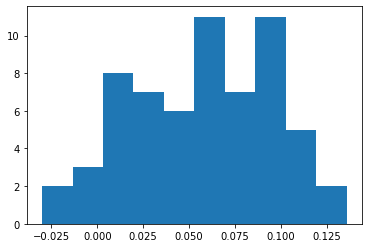

In [5]:
plt.hist(layer_bands[:,10,5])

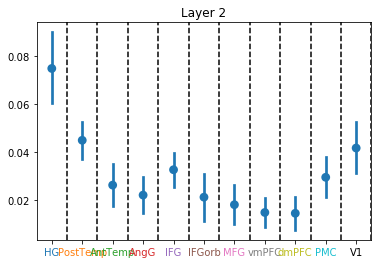

In [6]:
#layer_bands=get_results('encoding_layerbands','layerbands')

l_idx=1
roi=[]
performance=[]
example_layer=layer_bands[:,:,l_idx]
for i in range(example_layer.shape[0]):
    for j in range(20):
        roi.append(rois[j%11])
        r=example_layer[i,j]
        if r<-800:
            r=0
        performance.append(r)
roi=np.asarray(roi)
performance=np.asarray(performance)
df=pd.DataFrame(dict(performance=performance,roi=roi))
#plt.figure(figsize=(10,10))
plt.figure()
plt.title("Layer "+str(l_idx+1))
sns.pointplot(data=df.sort_values('performance'),x='roi',y='performance',dodge=0.5,join=False,ci=95,n_boot=10000,zorder=2,alpha=0.5,order=['HG','PostTemp','AntTemp','AngG','IFG',
'IFGorb','MFG','vmPFC','dmPFC','PMC','V1'],capsize=0,estimator=np.mean)
#sns.despine(top=True,right=True,left=False,bottom=False)
my_colors=['C'+str(i) for i in range(10)]
for ticklabel, tickcolor in zip(plt.gca().get_xticklabels(), my_colors):
    ticklabel.set_color(tickcolor)
plt.xlabel("")
plt.ylabel("")
#plt.ylim(-5,35)
for i in range(11):
    plt.axvline(x=i+0.5,color='black',linestyle='--')


In [7]:
layer_bands.shape

(62, 20, 12)

In [9]:
layer_bands[:,10,0].mean()

7.572499464337159

In [9]:
layer_bands=get_results('encoding_zbands','zbands')

for i in range(12):
    roi=[]
    performance=[]
    example_layer=layer_bands[:,:,0]
    for i in range(example_layer.shape[0]):
        for j in range(20):
            roi.append(rois[j%11])
            r=example_layer[i,j]
            if r<-800:
                r=0
            performance.append(r)
    roi=np.asarray(roi)
    performance=np.asarray(performance)
    df=pd.DataFrame(dict(performance=performance,roi=roi))
    #plt.figure(figsize=(10,10))
    plt.figure()
    plt.title("Layer "+str(i+1))
    sns.pointplot(data=df.sort_values('performance'),x='roi',y='performance',dodge=0.5,join=False,ci=95,n_boot=10000,zorder=2,alpha=0.5,order=['HG','PostTemp','AntTemp','AngG','IFG',
    'IFGorb','MFG','vmPFC','dmPFC','PMC','V1'],capsize=0,estimator=np.median)
    #sns.despine(top=True,right=True,left=False,bottom=False)
    my_colors=['C'+str(i) for i in range(10)]
    for ticklabel, tickcolor in zip(plt.gca().get_xticklabels(), my_colors):
        ticklabel.set_color(tickcolor)
    plt.xlabel("")
    plt.ylabel("")
    plt.ylim(-5,35)
    for i in range(11):
        plt.axvline(x=i+0.5,color='black',linestyle='--')


(0,)